# Problem set 4: Analyzing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import pandas as pd
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import warnings
warnings.filterwarnings('ignore')

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [2]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [3]:
# Create a DstApi object to interact with the DST server
nah1_api = DstApi('nah1') 

# Define a dictionary detailing the data
params = nah1_api._define_base_params(language='en')

# Download entire table as no changes to params have been specified
nah1 = nah1_api.get_data(params=params)

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [4]:
# Rename the columns in place
nah1.rename(columns=columns_dict, inplace=True)

# Rename the variables in place
for key,value in var_dict.items():
    nah1.variable.replace(key, value, inplace=True)

# Rename the units in place
for key,value in unit_dict.items():
    nah1.unit.replace(key, value, inplace=True)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [5]:
# Get variable values
var_vals = var_dict.values()

# Create a condition 
I = nah1['variable'].isin(var_vals)

# Pass the condtion to the DataFrame
nah1 = nah1[I]

# Set the values as float
nah1.value = nah1.value.astype('float')

**Step 4:** Discuss what the following summary statistics show.

In [6]:
# You might want to look to your right
nah1.groupby(['variable','unit']).describe()

year                                                       \
                 count    mean        std     min      25%     50%      75%   
variable unit                                                                 
C        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
G        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
I        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
M        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
X        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
Y        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2023.0  58.0  8.244479e+05  5.469235e+05    62576.0   
         real     2023.0  58.0  1.076291e+06  2.898590e+05   549491.0   
G        nominal  2023.0  58.0  2.792592e+05  1.923672e+05    14768.0   
         real     2023.0  58.0  3.764013e+05  1.051094e+05   171307.0   
I        nominal  2023.0  58.0  2.444002e+05  1.745533e+05    21134.0   
         real     2023.0  58.0  2.867579e+05  1.181413e+05   127630.0   
M        nominal  2023.0  58.0  4.892792e+05  4.317850e+05    24406.0   
         real     2023.0  58.0  5.195006e+05  3.544781e+05   112171.0   
X        nominal  2023.0  58.0  5.528454e+05  4.985943e+05    23110.0   
         real     2023.0  58.0  6.028840e+05  3.991342e+05   123594.0   
Y        nominal  2023.0  58.0  1.947528e+06  1.408522e+06   144582.0   
         real     2023.0  58.0  2.398514e+06  8.739746e+05  1089347.0   

                                                                
                         25%        50%         75%        max  
variable unit                                                   
C        nominal   331396.75   760812.5  1313458.75  1905750.0  
         real      848126.75  1049562.0  1353608.75  1569998.0  
G        nominal   109026.50   245849.5   473857.00   630549.0  
         real      312263.75   359337.5   484169.25   538248.0  
I        nominal    81899.50   200249.0   364978.50   676212.0  
         real      183260.00   251935.0   363662.25   567588.0  
M        nominal   137277.00   319217.5   830904.25  1668327.0  
         real      214768.00   375838.5   836879.75  1372758.0  
X        nominal   137473.50   373041.0   910000.25  1982502.0  
         real      250584.00   481929.0   935698.25  1613232.0  
Y        nominal   696373.00  1644185.0  3113699.50  5254759.0  
         real     1616288.50  2247981.5  3208718.00  4145336.0

**Step 5:** Sort the dataset by year

In [7]:
# Sort the DataFrame by year
nah1.sort_values(by='year',inplace=True)

# Display head
nah1.head()

,variable,unit,year,value
6,Y,real,1966,1089347.0
51,M,nominal,1966,24406.0
45,X,nominal,1966,23110.0
44,X,real,1966,123594.0
35,I,nominal,1966,21134.0


**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [8]:
FT_api = DstApi('FT')
params = FT_api._define_base_params(language='en')
params['variables'][0]['values'] = ['000'] 
## 000 is the code for all of Denmark, this can be seen by using: FT_api.variable_levels('HOVEDDELE', language='en')
pop = FT_api.get_data(params=params)

pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
pop =  pop.loc[:,['year','population']]
pop.head()

,year,population
0,2010,5534738
1,1769,797584
2,1840,1289075
3,1860,1608362
4,1901,2449540


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

**Answer:**
<br>
See below or A2.

In [9]:
# Merge the DataFrames
merged = pd.merge(nah1, pop, how='left', on=['year'])

# Display the tail of the new DataFrame
merged.tail(10)

,variable,unit,year,value,population
686,X,nominal,2023,1921769.0,5932654.0
687,X,real,2023,1613232.0,5932654.0
688,I,nominal,2023,612650.0,5932654.0
689,I,real,2023,498211.0,5932654.0
690,G,nominal,2023,630549.0,5932654.0
691,G,real,2023,523455.0,5932654.0
692,C,nominal,2023,1905750.0,5932654.0
693,C,real,2023,1551062.0,5932654.0
694,Y,real,2023,4145336.0,5932654.0
695,Y,nominal,2023,5192349.0,5932654.0


**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

**Answer:**
<br>
See below or A3.

In [10]:
# Create a DataFrame of pop with year as index
pop_with_index = pop.set_index('year')

# Rename the columns in place
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)

# Create a DataFrame of merged with year as index
merged_with_index = merged.set_index('year')

# Join the DataFrames on index
merged_alt = merged_with_index.join(pop_with_index)                               

# Display the tail of the new DataFrame
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2023,X,nominal,1921769.0,5932654.0,5932654.0
2023,X,real,1613232.0,5932654.0,5932654.0
2023,I,nominal,612650.0,5932654.0,5932654.0
2023,I,real,498211.0,5932654.0,5932654.0
2023,G,nominal,630549.0,5932654.0,5932654.0
2023,G,real,523455.0,5932654.0,5932654.0
2023,C,nominal,1905750.0,5932654.0,5932654.0
2023,C,real,1551062.0,5932654.0,5932654.0
2023,Y,real,4145336.0,5932654.0,5932654.0


## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

In [11]:
# Create a copy of nah1 to employ the plot
nah1_true = nah1.copy()

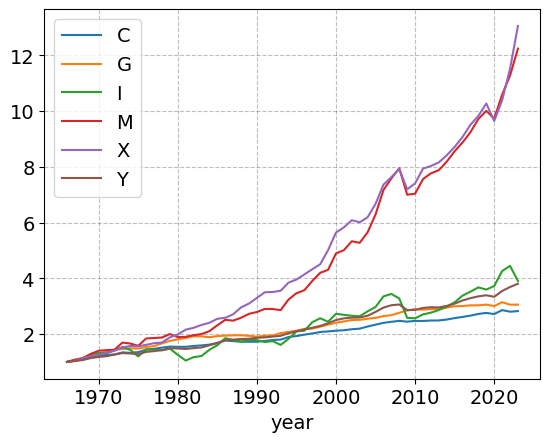

In [12]:
# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
plot(nah1_true)

**Question:** Implement the same split-apply-combine as above using `transform`.

**Answer:**
<br>
See below or A4.

In [13]:
# Select the first element in a series
def first(x): 
    return x.iloc[0]

# Create a copy of nah1
nah1_alt = nah1.copy()

# Group by 'variable' and 'unit'
grouped = nah1_alt.groupby(['variable','unit'])

# Index variable change
nah1_alt['index_transform'] = grouped['value'].transform(lambda x: x / first(x))

#Display head
nah1_alt.head()

,variable,unit,year,value,index_transform
6,Y,real,1966,1089347.0,1.0
51,M,nominal,1966,24406.0,1.0
45,X,nominal,1966,23110.0,1.0
44,X,real,1966,123594.0,1.0
35,I,nominal,1966,21134.0,1.0


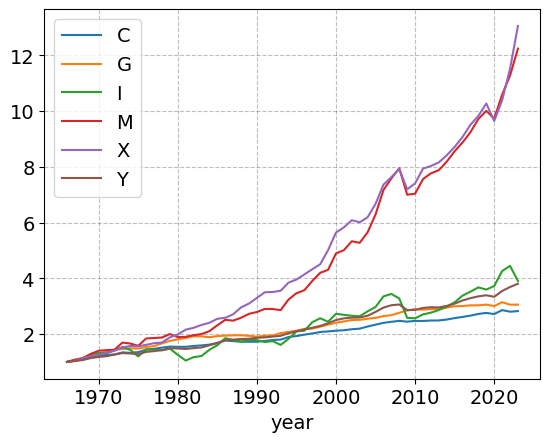

In [14]:
# Plot the index variable change using the plot function
plot(nah1_alt,variable='index_transform')

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [15]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.PeriodIndex(prices_long.d,freq='Q').to_timestamp() # Convert to datetime
# prices_long['date'] = pd.to_datetime(prices_long.d) This works just as well but throws a warning


# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [16]:
# a. Initiate dstapi 
folk1a_api = DstApi('FOLK1A')

# b. Define which data to load
params = folk1a_api._define_base_params(language='en')
params['variables'][1]['values'] = ['TOT']
params['variables'][2]['values'] = ['IALT']
params['variables'][3]['values'] = ['TOT']

# c. Load data
pop = folk1a_api.get_data(params=params)


# d. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# e. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# f. convert to date
pop['date'] = pd.PeriodIndex(pop.TID,freq='Q').to_timestamp() # Convert to datetime
del pop['TID']

pop.head()

,municipality,population,date
0,Brøndby,33998,2010-10-01
3,Brøndby,35197,2015-07-01
4,Hvidovre,50028,2010-10-01
5,Varde,50309,2015-07-01
6,Fredensborg,39254,2009-01-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

**Answer:**
<br>
See below or A5.

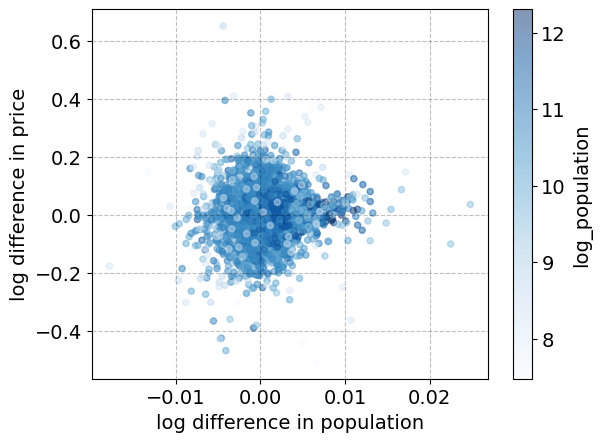

In [17]:
# Merge and sort the DataFrames 
full = pd.merge(pop, prices_long, how='left', on=['date','municipality'])
full.sort_values(['municipality','date'], inplace=True)

# Take logs
full['log_population'] = np.log(full['population'])
full['log_price'] = np.log(full['price'])

# Take first differences (growth rate)
full[['d_log_population','d_log_price']] = full.groupby('municipality')[['log_population','log_price']].diff(1)

# Plot
ax = full.plot(x = 'd_log_population', y = 'd_log_price', kind = 'scatter',
               c='log_population',cmap='Blues',alpha=0.5); 

ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price');



**Answer:**
<br>
See below or A6.

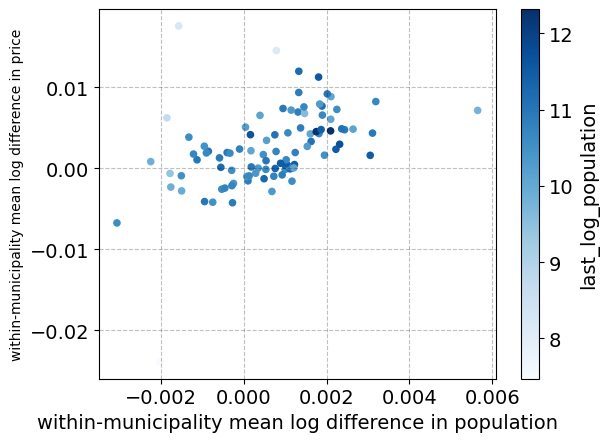

In [18]:
# Crate lambda function to calculate average of differences
mean_diff = lambda x: np.mean(x.diff())

# Group the DataFrame by 'municipality' and aggregate
    #For 'log_population', calculate both the mean difference and the last value
    #For 'log_price', calculate the mean difference
full_grouped = full.groupby('municipality').agg({'log_population':[mean_diff,'last'],'log_price':mean_diff})

# Rename columns
full_grouped.columns = ['md_log_population','last_log_population','md_log_price']


# Plot
ax = full_grouped.plot(x = 'md_log_population', y = 'md_log_price', kind = 'scatter',
                       c='last_log_population',cmap='Blues'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price',fontsize=10); 